### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from helper import compute_region_lin, compute_region_nonlin, plot_constraints

### Excercise 1

Producing Rubiks cubes and Toy cars

Variables:

Phase 1, manufacturing:
- $t_{rub,m}=4$: time in minutes to produce a Rubik's cube
- $t_{car,m}=5$: time in minutes to produce a car
- $t_{max,m}=120$: maximum time in minutes available before plastic runs out

Phase 2, painting:
- $t_{rub,p}=3$: time in minutes to paint a Rubik's cube
- $t_{car,p}=5$: time in minutes to paint a car
- $t_{max,p}=60$: maximum time in minutes available before paint runs out

Phase 3, assembling:
- $t_{rub,a}=0$: time in minutes to assemble a toy car
- $t_{car,a}=2$: time in minutes to assemble a Rubik's cube
- $t_{max,a}=30$: maximum time in minutes available before assembly stops

Profit:
- $p_{rub}=8$: profit per Rubik's cube
- $p_{car}=5$: profit per car

Number of products to be produced:
- $x_1$: Rubik's cubes
- $x_2$: cars

Other notes:
- Order of phases is fixed
- Products can't be produced in parallel
- Unfinished products are not sold

Cost function:
$$
\begin{align}
\max_{x_1,x_2}\text{ } & p_{rub}x_1 + p_{car}x_2 \\
\text{s.t. } & t_{rub,m}x_1 + t_{car,m}x_2 \leq t_{max,m} \\
& t_{rub,p}x_1 + t_{car,p}x_2 \leq t_{max,p} \\
& t_{rub,a}x_1 + t_{car,a}x_2 \leq t_{max,a} \\
& x_1,x_2 \geq 0
\end{align}
$$



Constants

In [2]:
# Phase 1, manufacturing:
t_rubm=4
t_carm=5
t_maxm=120

# Phase 2, painting:
t_rubp=3
t_carp=5
t_maxp=60

# Phase 3, assembling:
t_ruba=0
t_cara=2
t_maxa=30

# Profit:
p_rub=8
p_car=5

Constraints and objective function

In [3]:
# variable x_rub and x_car
x = cp.Variable(2)  # x_rub, x_car

# define objective function
obj = cp.Maximize(8 * x[0] + 5 * x[1])

# define constraints
constraints = [5 * x[0] + 4 * x[1] <= 120, 
               3 * x[0] + 5 * x[1] <= 60,
               2 * x[0] <= 30,
               x[0] >= 0,
               x[1] >= 0]

# define problem
prob = cp.Problem(obj, constraints)

# solve problem
prob.solve(solver='MOSEK')

# print solution
print("Status:", prob.status)
print("Optimal value:", prob.value)
print("Optimal var:", x.value)

Status: optimal
Optimal value: 134.99999999985337
Optimal var: [15.  3.]


Contour plot of solution + constraint boundaries

In [4]:
# objective function
def objective_exc1(x):
    return 8 * x[0] + 5 * x[1]

# define range for input
r_min, r_max = 0, 30

# sample input range uniformly at 0.1 increments
x0axis = np.arange(r_min, r_max, 0.01)
x1axis = np.arange(r_min, r_max, 0.01)

# create a mesh from the axis
x1, x2 = np.meshgrid(x0axis, x1axis)
x_plt = np.stack((x1, x2), axis=0)

# compute targets
results = objective_exc1(x_plt)

In [5]:
# constraints
def g1(x1, x2):
    return 5 * x1 + 4 * x2
def g2(x1, x2):
    return 3 * x1 + 5 * x2
def g3(x1, x2):
    return 2 * x1 + 0 * x2

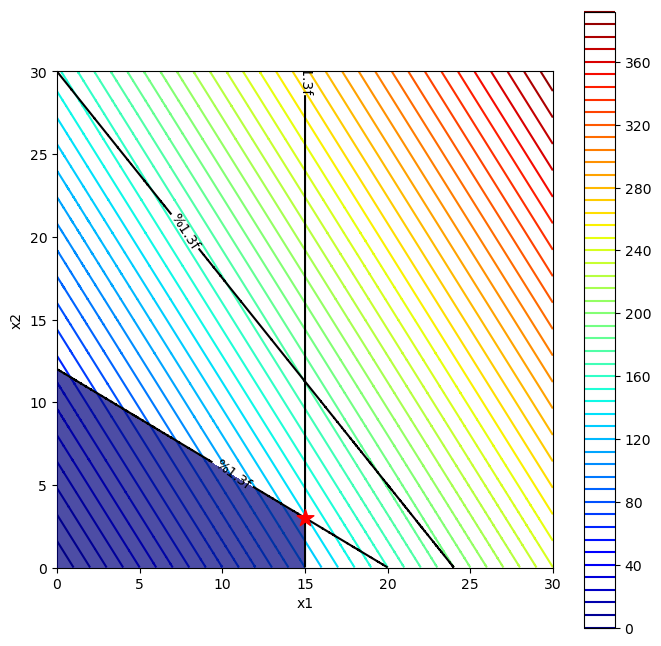

In [6]:
from helper import plot_constraints, compute_region_nonlin

# create a contour plot with 50 levels and jet color scheme
plt.figure(figsize=(8, 8))
plt.contour(x1, x2, results, 50, alpha=1.0, cmap=plt.cm.jet)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

# get list of python colors
colors = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# plot the constraints
ineq = [g1, g2, g3]
ub = [120, 60, 30]
plot_constraints(ineq, ub, x1, x2, zorder=10)

# plot the feasible region
region = compute_region_nonlin(ineq, ub, x1, x2)
masked_region = np.ma.masked_where(region == 0, region)

plt.imshow(masked_region, extent=(x1.min(), x1.max(), x2.min(), x2.max()), 
           origin="lower", cmap="jet", alpha = 0.7, zorder=5, interpolation='none')

# plot the results
plt.scatter(x.value[0], x.value[1], color='red', zorder=11, label='x*', marker='*', s=160, linewidth=1)

# limit the plot to the range
plt.xlim(r_min, r_max)
plt.ylim(r_min, r_max)
plt.show()

### Excercise 2

In [7]:
# variable x1 and x2
x = cp.Variable(2)  

# define objective function
obj = cp.Minimize((x[0] - 4)**2 + (x[1] - 4)**2)

# define constraints
constraints = [x[0] + 2 * x[1] <= 10,
               7 * x[0] - x[1] <= 15,
               x[0] >= 0,
               x[1] >= 0]

# define problem
prob = cp.Problem(obj, constraints)

# solve problem
prob.solve(solver='MOSEK')

# print solution
print("Status:", prob.status)
print("Optimal value:", prob.value)
print("Optimal var:", x.value)

Status: optimal
Optimal value: 1.8888889054401792
Optimal var: [2.66666666 3.66666666]


Contour plot of solution + constraint boundaries

In [8]:
# constraints
def g1(x1, x2):
    return x1 + 2 * x2
def g2(x1, x2):
    return 7 * x1 - x2

# objective function
def objective_exc2(x):
    return (x[0] - 4)**2 + (x[1] - 4)**2

# define range for input
r_min, r_max = -5, 5

# sample input range uniformly at 0.1 increments
x0axis = np.arange(r_min, r_max, 0.01)
x1axis = np.arange(r_min, r_max, 0.01)

# create a mesh from the axis
x1, x2 = np.meshgrid(x0axis, x1axis)
x_plt = np.stack((x1, x2), axis=0)

# compute targets
results = objective_exc2(x_plt)

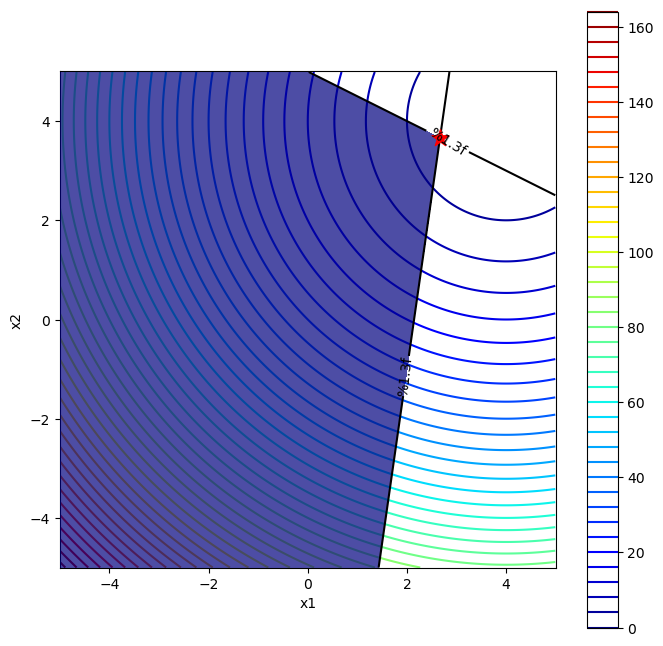

In [9]:
# create a contour plot with 50 levels and jet color scheme
plt.figure(figsize=(8, 8))
plt.contour(x1, x2, results, 50, alpha=1.0, cmap=plt.cm.jet)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

# get list of python colors
colors = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# plot the constraints
ineq = [g1, g2]
ub = [10, 15]
plot_constraints(ineq, ub, x1, x2, zorder=10)

# plot the feasible region
region = compute_region_nonlin(ineq, ub, x1, x2)
masked_region = np.ma.masked_where(region == 0, region)

plt.imshow(masked_region, extent=(x1.min(), x1.max(), x2.min(), x2.max()), 
           origin="lower", cmap="jet", alpha = 0.7, zorder=5, interpolation='none')

# plot the results
plt.scatter(x.value[0], x.value[1], color='red', zorder=11, label='x*', marker='*', s=160, linewidth=1)

# limit the plot to the range
plt.xlim(r_min, r_max)
plt.ylim(r_min, r_max)
plt.show()

### Excercise 3

In [10]:
# constant definitions
A1 = np.array([[1, 0, 1], 
               [0, 3, 7],
               [1, 7, 5]])

A2 = np.array([[0, 2, 8], 
               [2, 6, 0],
               [8, 0, 4]])

C = np.array([[1, 2, 3],
              [2, 9, 0],
              [3, 0, 7]])

b1 = 11
b2 = 19

# variable X = (3,3) matrix
X = cp.Variable((3, 3), symmetric=True)

# define objective function
# e = np.ones(3)
# obj = cp.Minimize(e.T @ cp.multiply(C, X) @ e)

obj = cp.Minimize(cp.sum(cp.multiply(C, X)))

# define constraints

# X must be positive semidefinite
constraints = [X >> 0]

# sum(Ai * X) = bi
constraints += [cp.sum(cp.multiply(A1, X)) == b1]
constraints += [cp.sum(cp.multiply(A2, X)) == b2]

# define problem
prob = cp.Problem(obj, constraints)

# solve problem
prob.solve(solver='MOSEK')

# print solution
print("Status:", prob.status)
print("Optimal value:", prob.value)
print("Optimal var:\n", np.round(X.value, 3))

Status: optimal
Optimal value: 13.902227774274198
Optimal var:
 [[1.056 0.369 0.868]
 [0.369 0.129 0.304]
 [0.868 0.304 0.714]]


### Excercise 4

 Matlab file only, skipping

### Excercise 5

 Matlab file only, skipping

### Excercise 6

In [14]:
import scipy.io

# load data
mat = scipy.io.loadmat('Leaf2012.mat')

# extract relevant data (0-29 = positive only)
col_max = 29
p_shaft_dat = mat['Shaft_Power'][:, 0:col_max]      # [W]
speed_dat = mat['Speed'][:, 0:col_max] * np.pi / 30 # [rad/s]
p_loss_dat = mat['Total_Loss'][:, 0:col_max]        # [W]
eff_dat = mat['Efficiency'][:, 0:col_max]           # [-]
torque_dat = mat['Shaft_Torque'][:, 0:col_max]      # [Nm]


# calculate electrical power from data
p_dc_dat = p_shaft_dat + p_loss_dat
eff_dat = p_shaft_dat / p_dc_dat 


Model A

Considering the following model:

$$
P_{dc} = \alpha(\omega) P_{m}^2 + P_{m}
$$

where $\alpha(\omega)$ is a function of the speed $\omega$.

In [52]:
# model A code: simple quadratic
omega = speed_dat.copy()
p_m = p_shaft_dat.copy()
p_dc_model_a = (10e-10) * omega * p_m**2 + p_m + 10e-3
eff_model_a = p_m / p_dc_model_a

Text(0.5, 1.0, 'Efficiency model A')

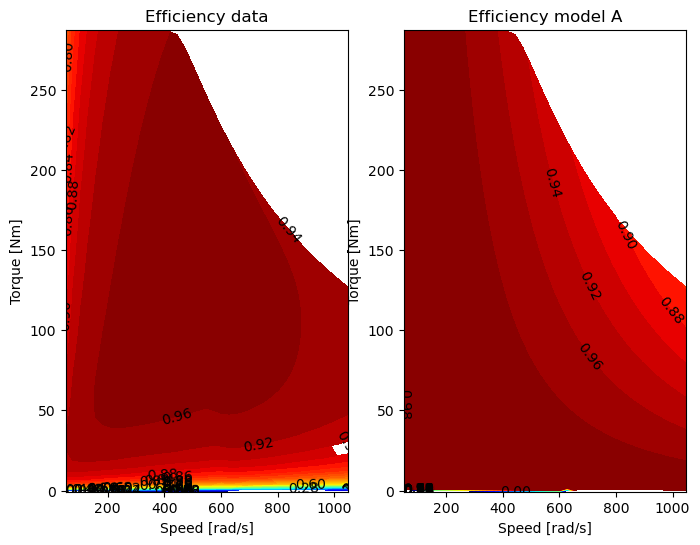

In [54]:
# plot model A vs data
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(8, 6)

# plot efficiency based on data
cnt = axs[0].contourf(speed_dat, torque_dat, eff_dat, 50, alpha=1.0, cmap=plt.cm.jet)
axs[0].clabel(cnt, inline=1, fontsize=10, fmt='%1.2f', colors='k')
axs[0].set_xlabel('Speed [rad/s]')
axs[0].set_ylabel('Torque [Nm]')
axs[0].set_title('Efficiency data')

# plot efficiency based on model A
cnt = axs[1].contourf(speed_dat, torque_dat, eff_model_a, 50, alpha=1.0, cmap=plt.cm.jet)
axs[1].clabel(cnt, inline=1, fontsize=10, fmt='%1.2f', colors='k')
axs[1].set_xlabel('Speed [rad/s]')
axs[1].set_ylabel('Torque [Nm]')
axs[1].set_title('Efficiency model A')
